# Machine Learning Final Project

Link of Kaggle Compitition: https://www.kaggle.com/competitions/smart-homes-temperature-time-series-forecasting/overview

In [ ]:
# Import Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


Sensors and Actuators Map as supplied with data.


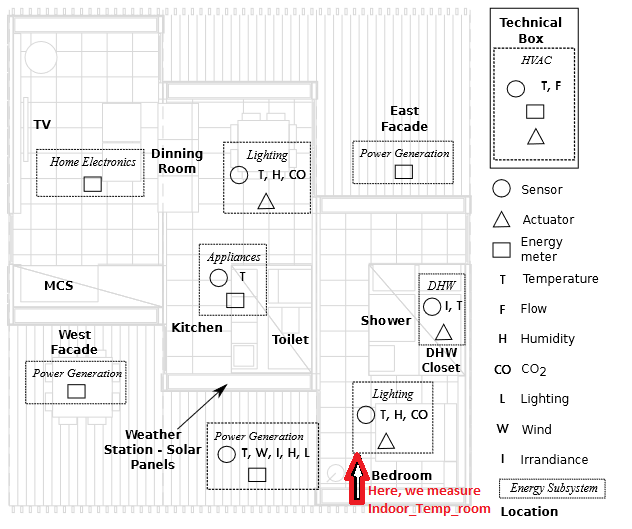

In [ ]:
# To display Image.
from IPython.display import Image, display

# Display the Sensors and Actuators Map.
path_to_image = "/content/Solar house sensors and actuators map.png"
display(Image(filename=path_to_image))

In [ ]:
# Import data as Panda DFs.
#df = pd.read_csv("/content/train.csv")
df = pd.read_csv("train.csv")
# Display some train data rows.
df

,Id,Date,Time,CO2_(dinning-room),CO2_room,Relative_humidity_(dinning-room),Relative_humidity_room,Lighting_(dinning-room),Lighting_room,Meteo_Rain,Meteo_Sun_dusk,Meteo_Wind,Meteo_Sun_light_in_west_facade,Meteo_Sun_light_in_east_facade,Meteo_Sun_light_in_south_facade,Meteo_Sun_irradiance,Outdoor_relative_humidity_Sensor,Day_of_the_week,Indoor_temperature_room
0,0,13/03/2012,11:45,216.560,221.920,39.9125,42.4150,81.6650,113.5200,0.0,623.360,1.426250,9690.24,12604.20,95436.800,758.8800,48.3750,2.0,17.8275
1,1,13/03/2012,12:00,219.947,220.363,39.9267,42.2453,81.7413,113.6050,0.0,623.211,1.592000,11022.00,10787.20,95436.800,762.0690,47.8080,2.0,18.1207
2,2,13/03/2012,12:15,219.403,218.933,39.7720,42.2267,81.4240,113.6000,0.0,622.656,1.891330,13960.50,9669.63,95398.600,766.2510,47.4320,2.0,18.4367
3,3,13/03/2012,12:30,218.613,217.045,39.7760,42.0987,81.5013,113.3440,0.0,622.571,1.828000,18511.20,9648.13,95360.300,766.0370,47.0240,2.0,18.7513
4,4,13/03/2012,12:45,217.714,216.080,39.7757,42.0686,81.4657,113.0340,0.0,622.400,2.360710,26349.00,9208.32,95354.900,762.7430,45.4743,2.0,19.0414
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2759,2759,11/04/2012,05:30,190.539,192.181,41.3120,41.6880,11.4427,12.9400,0.0,392.603,0.074667,0.00,0.00,0.000,-3.4340,49.2960,3.0,20.8187
2760,2760,11/04/2012,05:45,190.421,193.067,41.3173,41.7200,11.6867,19.3200,0.0,613.120,0.000000,465.92,2716.67,523.264,3.8520,50.0373,3.0,20.7053
2761,2761,11/04/2012,06:00,190.432,193.653,41.3333,41.7573,19.5387,23.2427,0.0,613.803,0.310667,3454.98,16203.80,3347.460,26.8300,50.0587,3.0,20.5827
2762,2762,11/04/2012,06:15,191.531,193.387,41.3093,41.8107,20.9853,23.4400,0.0,615.403,0.299333,6795.26,38303.10,7110.660,66.9493,49.8400,3.0,20.5200


By printing info we can see that the data doesn't have any null inputs.

# Preproccessing the Data.

Close inspection of data shows that the data has some errors in Day of Week data on 00:00 times. Hence we make the Day of the Week data int and correct the data.

In [ ]:
# Correcting the Day_of_Week column.
df['Day_of_the_week'] = df['Day_of_the_week'].round().astype(int)

In [ ]:
# Make the DateTime column.
df['DateTime'] = pd.to_datetime(df.Date + df.Time, format = '%d/%m/%Y%H:%M')
df = df.set_index('DateTime')  # Set the DateTime as index.
df = df.drop(columns=['Date','Time']) # We don't need these anymore
df

,Id,CO2_(dinning-room),CO2_room,Relative_humidity_(dinning-room),Relative_humidity_room,Lighting_(dinning-room),Lighting_room,Meteo_Rain,Meteo_Sun_dusk,Meteo_Wind,Meteo_Sun_light_in_west_facade,Meteo_Sun_light_in_east_facade,Meteo_Sun_light_in_south_facade,Meteo_Sun_irradiance,Outdoor_relative_humidity_Sensor,Day_of_the_week,Indoor_temperature_room
DateTime,,,,,,,,,,,,,,,,,
2012-03-13 11:45:00,0,216.560,221.920,39.9125,42.4150,81.6650,113.5200,0.0,623.360,1.426250,9690.24,12604.20,95436.800,758.8800,48.3750,2,17.8275
2012-03-13 12:00:00,1,219.947,220.363,39.9267,42.2453,81.7413,113.6050,0.0,623.211,1.592000,11022.00,10787.20,95436.800,762.0690,47.8080,2,18.1207
2012-03-13 12:15:00,2,219.403,218.933,39.7720,42.2267,81.4240,113.6000,0.0,622.656,1.891330,13960.50,9669.63,95398.600,766.2510,47.4320,2,18.4367
2012-03-13 12:30:00,3,218.613,217.045,39.7760,42.0987,81.5013,113.3440,0.0,622.571,1.828000,18511.20,9648.13,95360.300,766.0370,47.0240,2,18.7513
2012-03-13 12:45:00,4,217.714,216.080,39.7757,42.0686,81.4657,113.0340,0.0,622.400,2.360710,26349.00,9208.32,95354.900,762.7430,45.4743,2,19.0414
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-04-11 05:30:00,2759,190.539,192.181,41.3120,41.6880,11.4427,12.9400,0.0,392.603,0.074667,0.00,0.00,0.000,-3.4340,49.2960,3,20.8187
2012-04-11 05:45:00,2760,190.421,193.067,41.3173,41.7200,11.6867,19.3200,0.0,613.120,0.000000,465.92,2716.67,523.264,3.8520,50.0373,3,20.7053
2012-04-11 06:00:00,2761,190.432,193.653,41.3333,41.7573,19.5387,23.2427,0.0,613.803,0.310667,3454.98,16203.80,3347.460,26.8300,50.0587,3,20.5827


Make the date and time related feature.

In [ ]:
def make_time_id(time):
  #print(time.hour)
  return time.hour*4 + time.minute/15

df.insert(1,'hour',df.index.hour)
df.insert(2,'dayofyear',df.index.dayofyear)
df.insert(3,'time_id', [make_time_id(time) for time in df.index.time])
df.head()

,Id,hour,dayofyear,time_id,CO2_(dinning-room),CO2_room,Relative_humidity_(dinning-room),Relative_humidity_room,Lighting_(dinning-room),Lighting_room,Meteo_Rain,Meteo_Sun_dusk,Meteo_Wind,Meteo_Sun_light_in_west_facade,Meteo_Sun_light_in_east_facade,Meteo_Sun_light_in_south_facade,Meteo_Sun_irradiance,Outdoor_relative_humidity_Sensor,Day_of_the_week,Indoor_temperature_room
DateTime,,,,,,,,,,,,,,,,,,,,
2012-03-13 11:45:00,0,11,73,47.0,216.560,221.920,39.9125,42.4150,81.6650,113.520,0.0,623.360,1.42625,9690.24,12604.20,95436.8,758.880,48.3750,2,17.8275
2012-03-13 12:00:00,1,12,73,48.0,219.947,220.363,39.9267,42.2453,81.7413,113.605,0.0,623.211,1.59200,11022.00,10787.20,95436.8,762.069,47.8080,2,18.1207
2012-03-13 12:15:00,2,12,73,49.0,219.403,218.933,39.7720,42.2267,81.4240,113.600,0.0,622.656,1.89133,13960.50,9669.63,95398.6,766.251,47.4320,2,18.4367
2012-03-13 12:30:00,3,12,73,50.0,218.613,217.045,39.7760,42.0987,81.5013,113.344,0.0,622.571,1.82800,18511.20,9648.13,95360.3,766.037,47.0240,2,18.7513
2012-03-13 12:45:00,4,12,73,51.0,217.714,216.080,39.7757,42.0686,81.4657,113.034,0.0,622.400,2.36071,26349.00,9208.32,95354.9,762.743,45.4743,2,19.0414


In [ ]:
df.shape

(2764, 20)

As the data set is of weather components we can expect there to be daily and yearly seasonality in data. But the data corresponds to 40 days only, therefore we will only be able to see daily variation. So we plot the average of daily variation in data that vary with time.

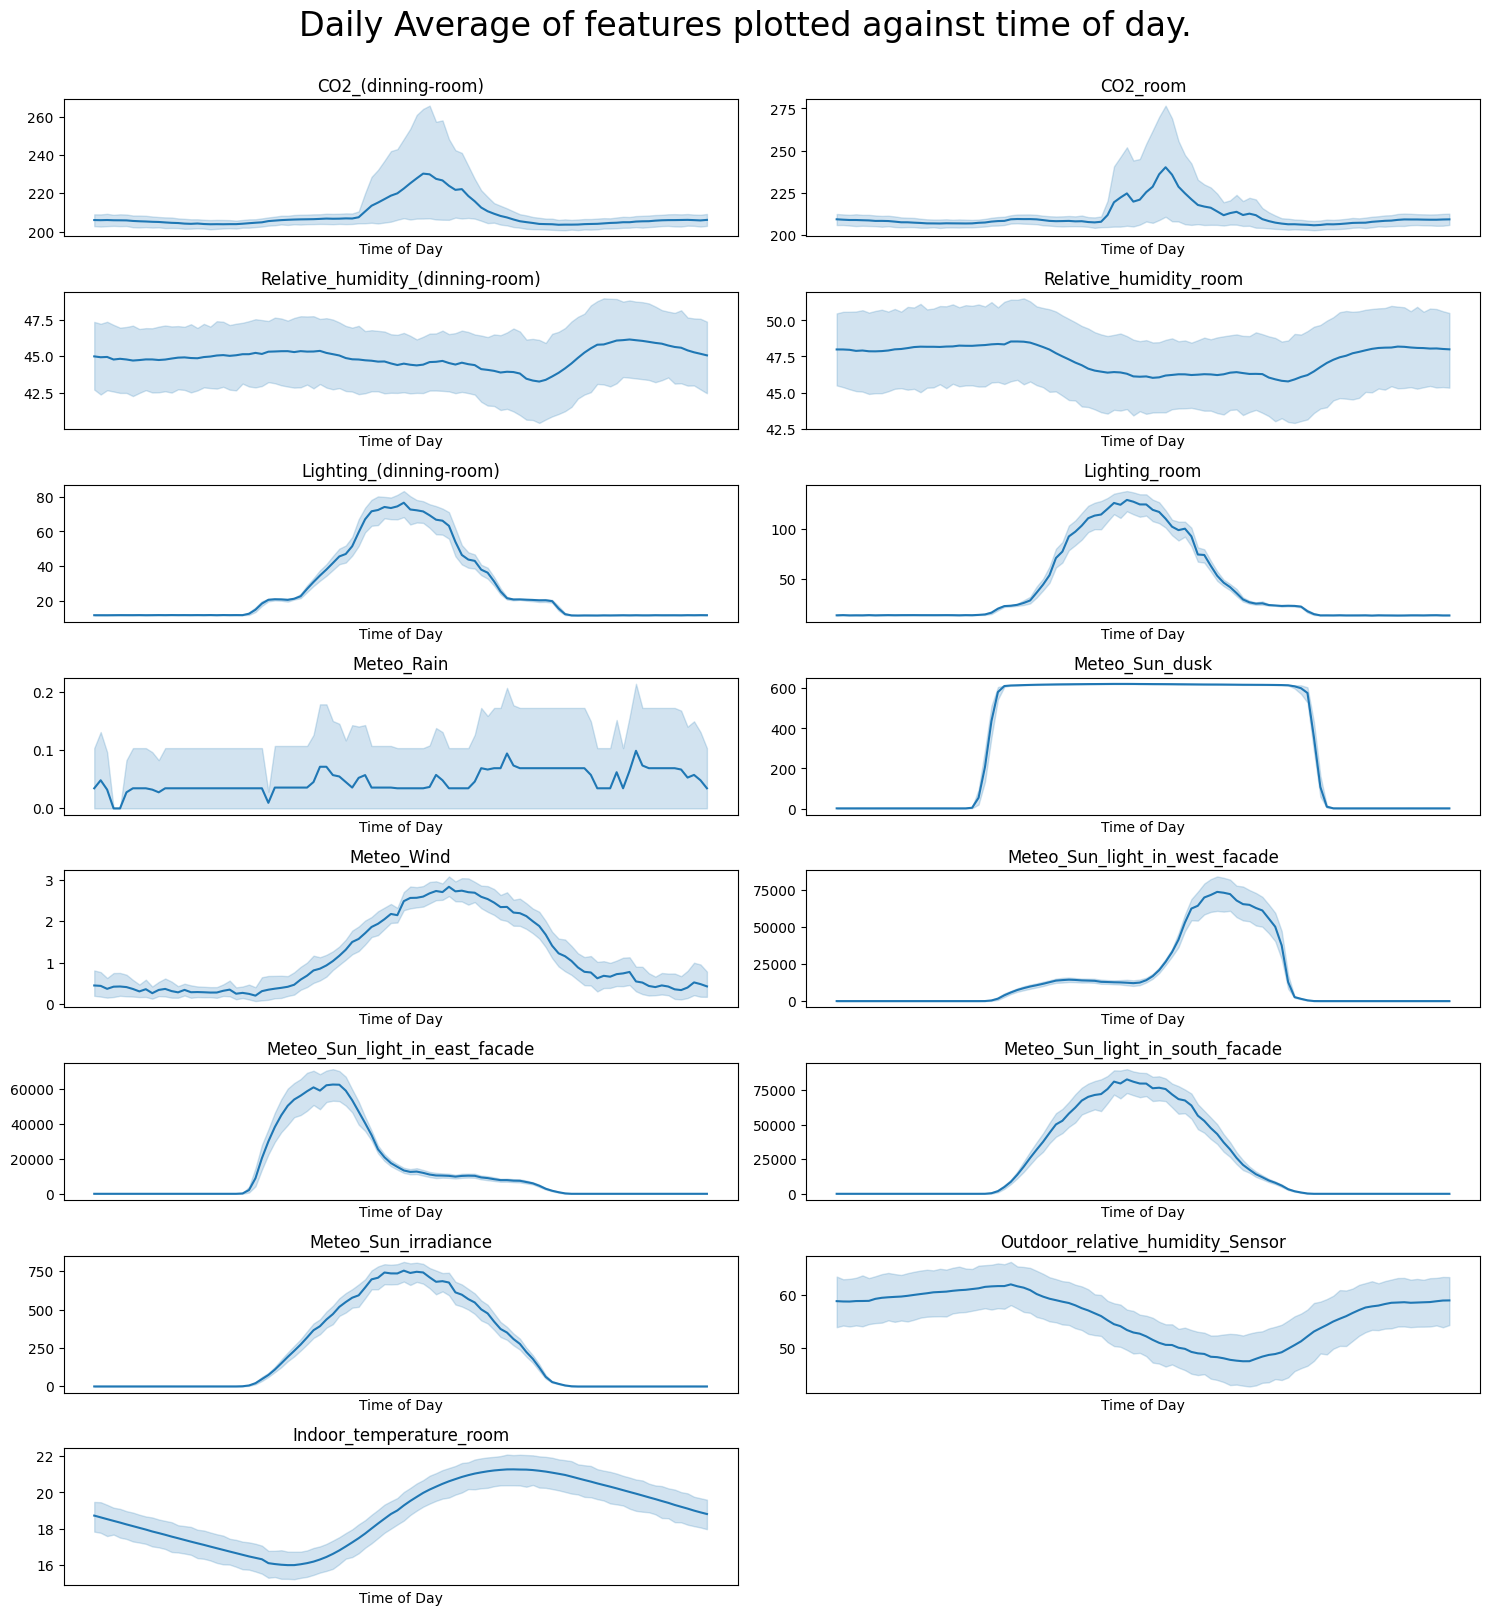

In [ ]:
# Plotting style and code modified from : "https://www.kaggle.com/code/guohaoming/sdse-rnns-for-temperature-forecasting/notebook" by: Haoming Guo,Frank Aliaga and Tom Springer.

# Plot features with time to visalize variation accross time in data. Data is averaged for a day in below plots.
sub_features = [feature for feature in df.columns if feature not in ['Id','Day_of_the_week','hour','dayofyear','time_id']]

fig = plt.figure(figsize=(15,30))
# fig, ax = plt.subplots(int(len(sub_features)/2)+1,2)
for i, feature in enumerate(sub_features):
  ax = plt.subplot(len(sub_features) ,2, i+1)
  sns.lineplot(data=df,x='time_id',y=feature)
  # If there are multiple rows with the same x(Date) in data, Seaborn
  # will take the mean of them and draw 95% confidence interval around the mean.
  ax.set_xticks([])
  ax.set_ylabel('')
  ax.set_xlabel('Time of Day')
  ax.set_title(feature)
fig.suptitle("Daily Average of features plotted against time of day.",fontsize=24)
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.show()

From plots there seems that some features might have a trend.

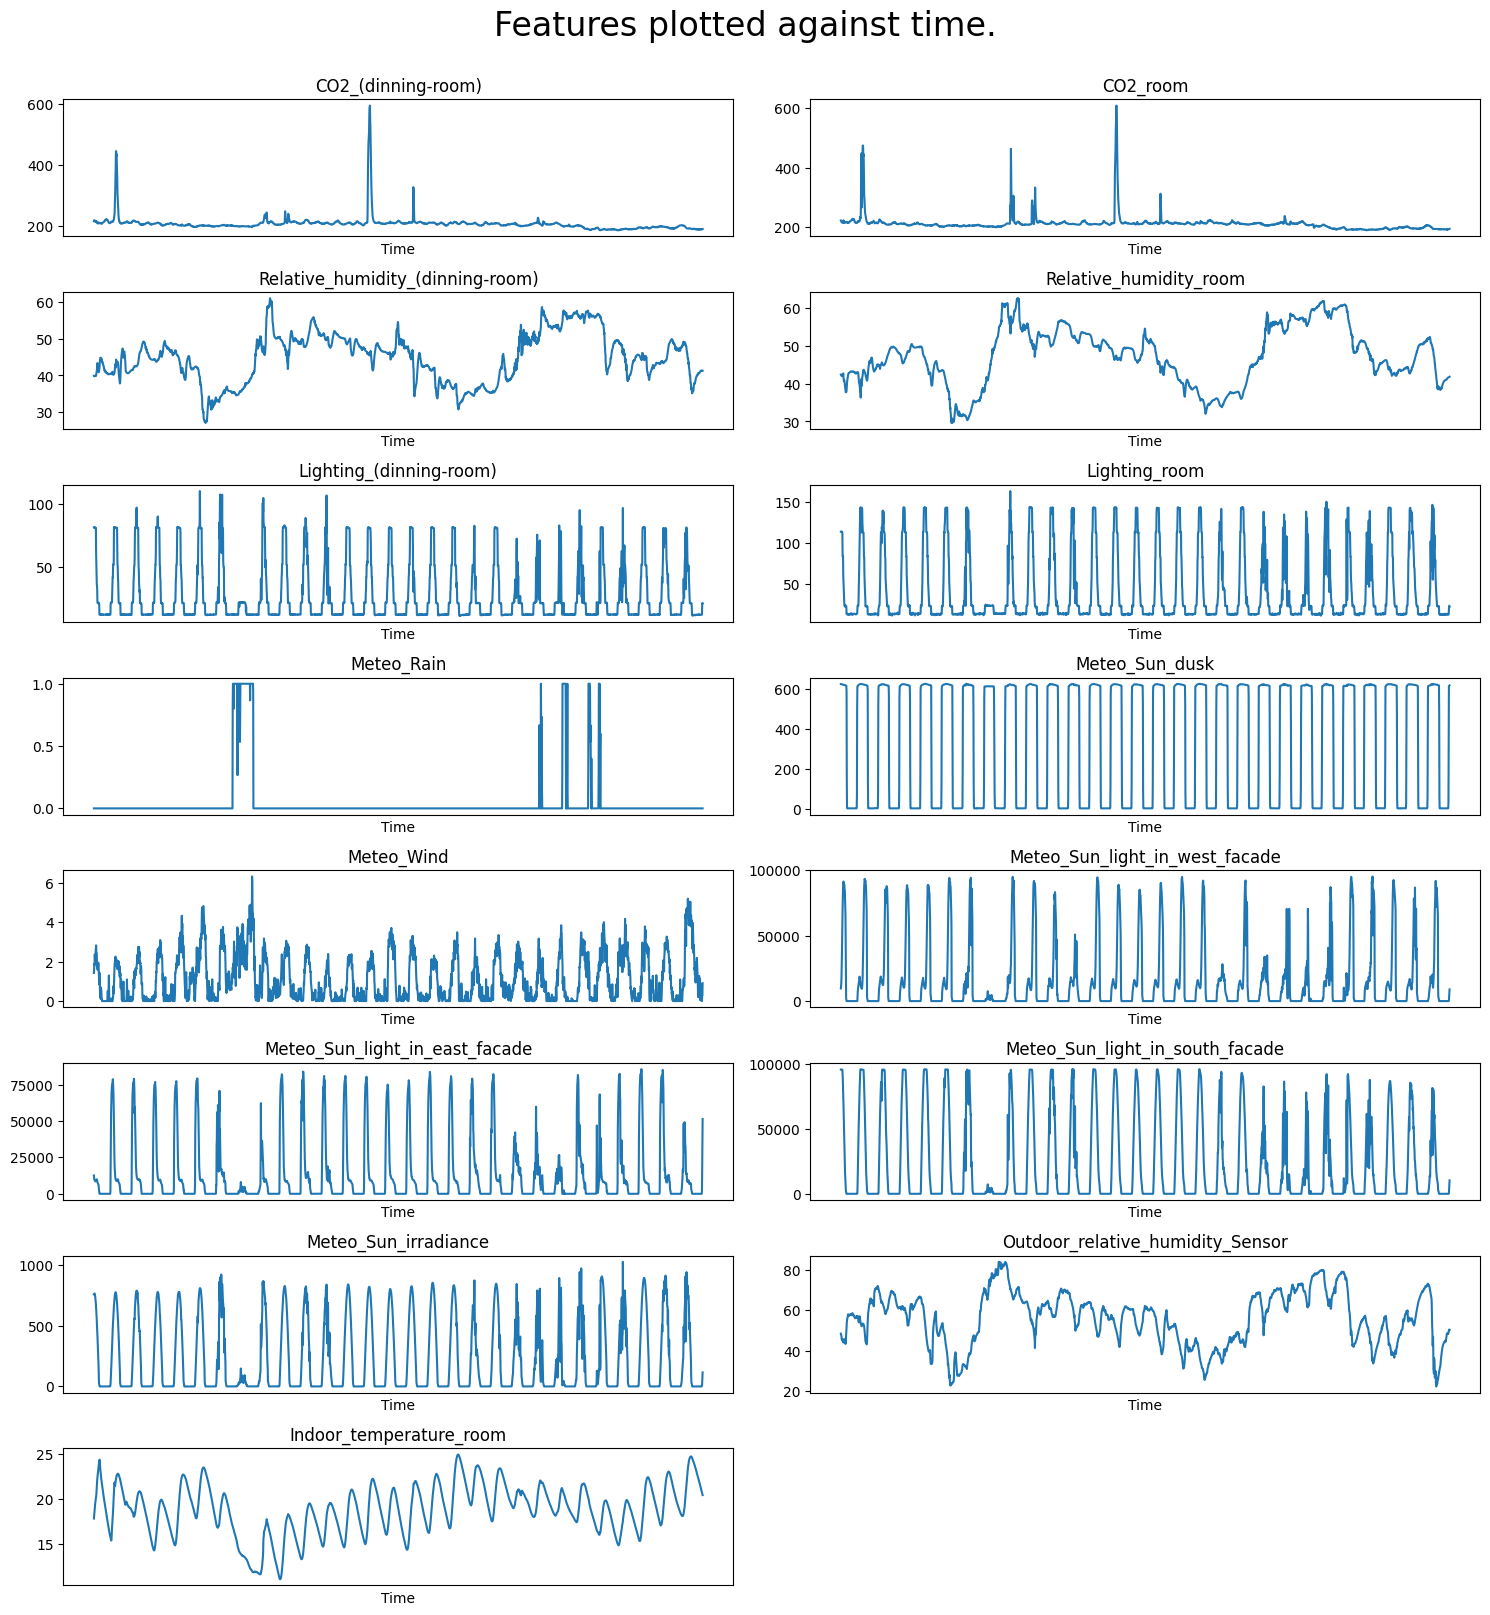

In [ ]:
# Plotting style and code modified from : "https://www.kaggle.com/code/guohaoming/sdse-rnns-for-temperature-forecasting/notebook" by: Haoming Guo,Frank Aliaga and Tom Springer.

# Plot features with time to visalize variation accross time in data. Id can be used as a timestamp here, therefore we don't need to create a feature.
# sub_features = [feature for feature in train.columns if feature not in ['Id', 'Date','Time','Day_of_the_week']]

fig = plt.figure(figsize=(15,30))
for i, feature in enumerate(sub_features):
  ax = plt.subplot(len(sub_features) ,2, i+1)
  sns.lineplot(data=df,x=df.index,y=feature)
  ax.set_xticks([])
  ax.set_ylabel('')
  ax.set_xlabel('Time')
  ax.set_title(feature)
fig.suptitle("Features plotted against time.",fontsize=24)
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.show()

Make the train and test set from the data.

In [ ]:
train = df.loc[df.index < '2012-04-9']
test  = df.loc[df.index >= '2012-04-9']
train.columns

Index(['Id', 'hour', 'dayofyear', 'time_id', 'CO2_(dinning-room)', 'CO2_room',
       'Relative_humidity_(dinning-room)', 'Relative_humidity_room',
       'Lighting_(dinning-room)', 'Lighting_room', 'Meteo_Rain',
       'Meteo_Sun_dusk', 'Meteo_Wind', 'Meteo_Sun_light_in_west_facade',
       'Meteo_Sun_light_in_east_facade', 'Meteo_Sun_light_in_south_facade',
       'Meteo_Sun_irradiance', 'Outdoor_relative_humidity_Sensor',
       'Day_of_the_week', 'Indoor_temperature_room'],
      dtype='object')

In [ ]:
FEATURES = ['Id', 'hour', 'dayofyear', 'time_id', 'CO2_(dinning-room)', 'CO2_room',
       'Relative_humidity_(dinning-room)', 'Relative_humidity_room',
       'Lighting_(dinning-room)', 'Lighting_room', 'Meteo_Rain',
       'Meteo_Sun_dusk', 'Meteo_Wind', 'Meteo_Sun_light_in_west_facade',
       'Meteo_Sun_light_in_east_facade', 'Meteo_Sun_light_in_south_facade',
       'Meteo_Sun_irradiance', 'Outdoor_relative_humidity_Sensor',
       'Day_of_the_week']

TARGET = 'Indoor_temperature_room'

X_train = train[FEATURES]
y_train = train[TARGET]

X_test = test[FEATURES]
y_test = test[TARGET]

# LR model with given features.

Temperature in the room will depend on the other weather realted data provided. We first try to fit a linear regression model will other columns as features.

In [ ]:
# Training the model.
lr_model_1 = LinearRegression()
lr_model_1.fit(X_train,y_train)

# Store the predicted values in a new df, with the same time index as training data.
pred_train = lr_model_1.predict(X_train)
pred_test  = lr_model_1.predict(X_test)

# Error on Training and test data.
mse_train = mean_squared_error(y_train, pred_train)
mse_test = mean_squared_error(y_test, pred_test)
print('MSE on the training data is : ', mse_train)
print('MSE on the test set is.     :', mse_test)

MSE on the training data is :  2.6842025107121006
MSE on the test set is.     : 1.6612760236793003


Ploting the models prediction for the Temperature.

In [ ]:
# Merge the predictions to our dataframe.
train['prediction'] = pred_train
test['prediction'] = pred_test
# train

<ipython-input-23-e4463f45cec2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['prediction'] = pred_train
<ipython-input-23-e4463f45cec2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['prediction'] = pred_test


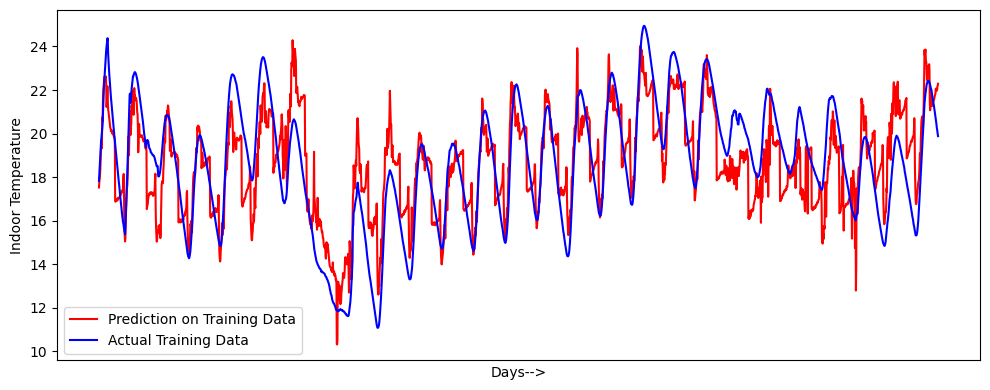

In [ ]:
# Plot the predicted values on Training data.
fig = plt.figure(figsize=(10,4))

sns.lineplot(data=(train),y = 'prediction', x = 'Id', color='red', label='Prediction on Training Data')
sns.lineplot(data=(train),y ='Indoor_temperature_room', x ="Id", color='blue', label='Actual Training Data')

plt.xlabel('Days-->')
plt.ylabel('Indoor Temperature')
plt.xticks([])
fig.tight_layout()
plt.show()

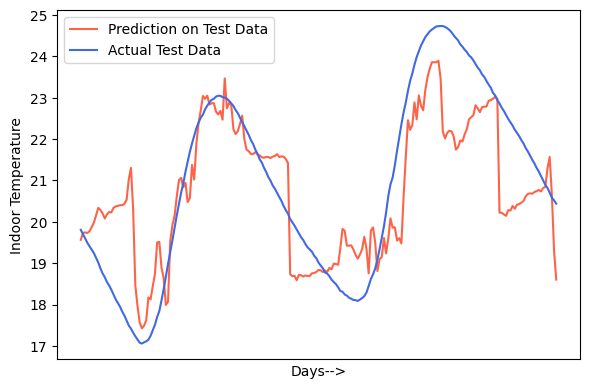

In [ ]:
# Plot the predicted values on Training data.
fig = plt.figure(figsize=(6,4))

sns.lineplot(data=(test),y ='prediction', x ="Id", color='tomato', label='Prediction on Test Data')
sns.lineplot(data=(test),y ='Indoor_temperature_room', x ="Id", color='royalblue', label='Actual Test Data')

plt.xlabel('Days-->')
plt.ylabel('Indoor Temperature')
plt.xticks([])
fig.tight_layout()
plt.show()

The error on the dataset is high, now we try to add lag features to the data.

# LR model with lag features

First we try to see the realtion ship of temperature with its lags.

[ 1.          0.99873275 -0.93831189 -0.20700508 -0.16158993  0.04931439
 -0.02314916  0.01843066  0.0715149   0.05752556  0.04408734  0.06168161
  0.03728199  0.07519491  0.03410646]


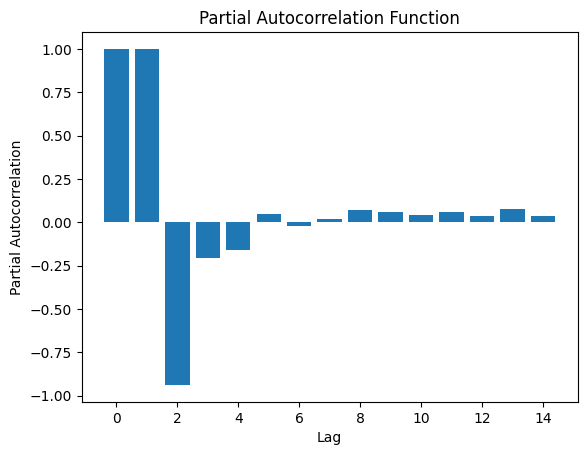

In [ ]:
from statsmodels.tsa.stattools import acf, pacf

# Calculate autocorrelation for different lags
lags = range(0,15)
# autocorrelation_values = [df['Indoor_temperature_room'].autocorr(lag=lag) for lag in lags]
# acf_values = acf(df['Indoor_temperature_room'], nlags=max(lags), fft=False)
pacf_values = pacf(df['Indoor_temperature_room'], nlags=max(lags), method='ols')
print(pacf_values)
# Plot partial autocorrelation values
plt.bar(lags, pacf_values)
# plt.bar(lags, acf_values)
# plt.bar(lags, autocorrelation_values)
plt.title('Partial Autocorrelation Function')
plt.xlabel('Lag')
plt.ylabel('Partial Autocorrelation')
plt.show()

In [ ]:
pacf_values

array([ 1.        ,  0.99873275, -0.93831189, -0.20700508, -0.16158993,
        0.04931439, -0.02314916,  0.01843066,  0.0715149 ,  0.05752556,
        0.04408734,  0.06168161,  0.03728199,  0.07519491,  0.03410646])

From the graph we see that data has high dependence on Lag 1,2,3 and 4. So we take these features into consideration when training our model.

In [ ]:
# Make Lag features.
def make_lags(df, feature, num):
  df = df.copy()
  for i in range(1,num+1):
    df.insert(i, f'Lag_{i}', df[feature].shift(i) )
    # df[f'Lag_{i}'] = df[feature].shift(i)
  df.dropna(inplace=True)
  return df

df_lag = make_lags(df, 'Indoor_temperature_room', 4)
df_lag

,Id,Lag_1,Lag_2,Lag_3,Lag_4,hour,dayofyear,time_id,CO2_(dinning-room),CO2_room,...,Meteo_Rain,Meteo_Sun_dusk,Meteo_Wind,Meteo_Sun_light_in_west_facade,Meteo_Sun_light_in_east_facade,Meteo_Sun_light_in_south_facade,Meteo_Sun_irradiance,Outdoor_relative_humidity_Sensor,Day_of_the_week,Indoor_temperature_room
DateTime,,,,,,,,,,,,,,,,,,,,,
2012-03-13 12:45:00,4,18.7513,18.4367,18.1207,17.8275,12,73,51.0,217.714,216.080,...,0.0,622.400,2.360710,26349.00,9208.32,95354.900,762.7430,45.4743,2,19.0414
2012-03-13 13:00:00,5,19.0414,18.7513,18.4367,18.1207,13,73,52.0,218.389,216.011,...,0.0,622.400,2.063330,36511.70,8694.78,95354.900,752.6830,45.5467,2,19.2773
2012-03-13 13:15:00,6,19.2773,19.0414,18.7513,18.4367,13,73,53.0,218.155,215.829,...,0.0,622.400,2.230670,49288.50,8501.25,95354.900,740.9490,44.9680,2,19.5367
2012-03-13 13:30:00,7,19.5367,19.2773,19.0414,18.7513,13,73,54.0,216.661,215.296,...,0.0,621.803,1.924000,62253.70,8687.62,95174.700,721.1090,45.1813,2,19.7307
2012-03-13 13:45:00,8,19.7307,19.5367,19.2773,19.0414,13,73,55.0,217.461,214.549,...,0.0,620.651,2.510670,71453.40,8888.32,91848.700,699.3920,45.4160,2,19.9693
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-04-11 05:30:00,2759,20.8960,21.0013,21.1093,21.2160,5,102,22.0,190.539,192.181,...,0.0,392.603,0.074667,0.00,0.00,0.000,-3.4340,49.2960,3,20.8187
2012-04-11 05:45:00,2760,20.8187,20.8960,21.0013,21.1093,5,102,23.0,190.421,193.067,...,0.0,613.120,0.000000,465.92,2716.67,523.264,3.8520,50.0373,3,20.7053
2012-04-11 06:00:00,2761,20.7053,20.8187,20.8960,21.0013,6,102,24.0,190.432,193.653,...,0.0,613.803,0.310667,3454.98,16203.80,3347.460,26.8300,50.0587,3,20.5827


Trai/Test Split

In [ ]:
train = df_lag.loc[df_lag.index < '2012-04-09']
test  = df_lag.loc[df_lag.index >= '2012-04-09']
train.columns

Index(['Id', 'Lag_1', 'Lag_2', 'Lag_3', 'Lag_4', 'hour', 'dayofyear',
       'time_id', 'CO2_(dinning-room)', 'CO2_room',
       'Relative_humidity_(dinning-room)', 'Relative_humidity_room',
       'Lighting_(dinning-room)', 'Lighting_room', 'Meteo_Rain',
       'Meteo_Sun_dusk', 'Meteo_Wind', 'Meteo_Sun_light_in_west_facade',
       'Meteo_Sun_light_in_east_facade', 'Meteo_Sun_light_in_south_facade',
       'Meteo_Sun_irradiance', 'Outdoor_relative_humidity_Sensor',
       'Day_of_the_week', 'Indoor_temperature_room'],
      dtype='object')

In [ ]:
FEATURES = ['Id', 'Lag_1', 'Lag_2', 'Lag_3', 'Lag_4', 'hour', 'dayofyear',
       'time_id', 'CO2_(dinning-room)', 'CO2_room',
       'Relative_humidity_(dinning-room)', 'Relative_humidity_room',
       'Lighting_(dinning-room)', 'Lighting_room', 'Meteo_Rain',
       'Meteo_Sun_dusk', 'Meteo_Wind', 'Meteo_Sun_light_in_west_facade',
       'Meteo_Sun_light_in_east_facade', 'Meteo_Sun_light_in_south_facade',
       'Meteo_Sun_irradiance', 'Outdoor_relative_humidity_Sensor',
       'Day_of_the_week']

TARGET = 'Indoor_temperature_room'

X_train = train[FEATURES]
y_train = train[TARGET]

X_test = test[FEATURES]
y_test = test[TARGET]


# X_test['temp_forcast'] = np.nan

# num_of_lags = 4
# for i in range(num_of_lags):
#   X_test['temp_forcast'][len(X_train)-num_of_lags: len(X_train)]  = y_train['Indoor_temperature_room']

LR Model with Lag Features.

In [ ]:
# Training the model.
lr_model_lag = LinearRegression()
lr_model_lag.fit(X_train,y_train)

# Store the predicted values in a new df, with the same time index as training data.
pred_train = lr_model_lag.predict(X_train)
pred_test  = lr_model_lag.predict(X_test)

# Error on Training and test data.
mse_train = mean_squared_error(y_train, pred_train)
mse_test = mean_squared_error(y_test, pred_test)
print('MSE on the training data is : ', mse_train)
print('MSE on the test set is.     :', mse_test)

MSE on the training data is :  0.0019415478716504606
MSE on the test set is.     : 0.0007624746510440359


In [ ]:
# Merge the predictions to our dataframe.
train['prediction'] = pred_train
test['prediction'] = pred_test
# train

<ipython-input-117-e4463f45cec2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['prediction'] = pred_train
<ipython-input-117-e4463f45cec2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['prediction'] = pred_test


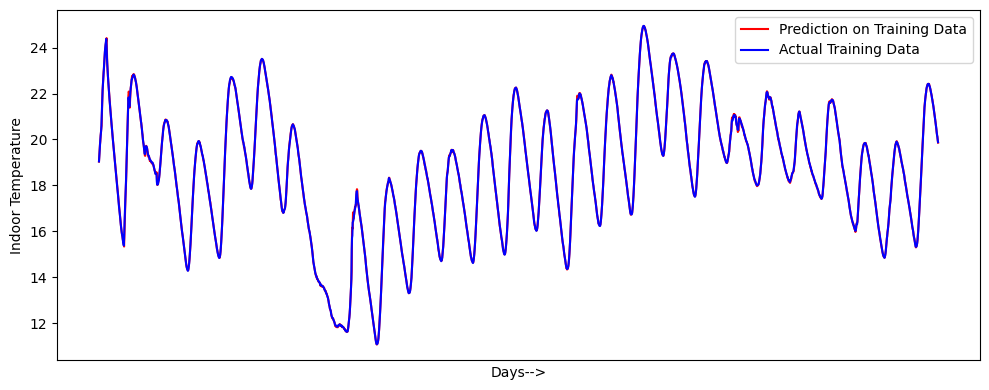

In [ ]:
# Plot the predicted values on Training data.
fig = plt.figure(figsize=(10,4))

sns.lineplot(data=(train),y = 'prediction', x = 'Id', color='red', label='Prediction on Training Data')
sns.lineplot(data=(train),y ='Indoor_temperature_room', x ="Id", color='blue', label='Actual Training Data')

plt.xlabel('Days-->')
plt.ylabel('Indoor Temperature')
plt.xticks([])
fig.tight_layout()
plt.show()

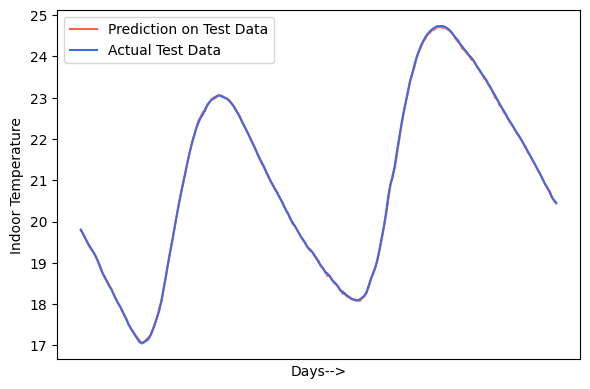

In [ ]:
# Plot the predicted values on Training data.
fig = plt.figure(figsize=(6,4))

sns.lineplot(data=(test),y ='prediction', x ="Id", color='tomato', label='Prediction on Test Data')
sns.lineplot(data=(test),y ='Indoor_temperature_room', x ="Id", color='royalblue', label='Actual Test Data')

plt.xlabel('Days-->')
plt.ylabel('Indoor Temperature')
plt.xticks([])
fig.tight_layout()
plt.show()

We seee that the model with lag features is very good at prediction of temperature as it have access to the previous temp, and as temperature cannot change abroupty this gives very good reults. However the caveat is that the we will not be able to predict the temperature into future for the period which we don't have the actual value of temperture to create lag features. This can be cicumventted with using regressive methods to predict next value at every step and them considering the predicted value as actual we predict the next one. However the error in this keeps on piling up and our model is not able to predict very well after some time.

# Linear tree method

In [ ]:
# Installing the package.

!pip install -q --upgrade linear-tree

from lineartree import LinearBoostRegressor

In [ ]:
df

,Id,hour,dayofyear,time_id,CO2_(dinning-room),CO2_room,Relative_humidity_(dinning-room),Relative_humidity_room,Lighting_(dinning-room),Lighting_room,Meteo_Rain,Meteo_Sun_dusk,Meteo_Wind,Meteo_Sun_light_in_west_facade,Meteo_Sun_light_in_east_facade,Meteo_Sun_light_in_south_facade,Meteo_Sun_irradiance,Outdoor_relative_humidity_Sensor,Day_of_the_week,Indoor_temperature_room
DateTime,,,,,,,,,,,,,,,,,,,,
2012-03-13 11:45:00,0,11,73,47.0,216.560,221.920,39.9125,42.4150,81.6650,113.5200,0.0,623.360,1.426250,9690.24,12604.20,95436.800,758.8800,48.3750,2,17.8275
2012-03-13 12:00:00,1,12,73,48.0,219.947,220.363,39.9267,42.2453,81.7413,113.6050,0.0,623.211,1.592000,11022.00,10787.20,95436.800,762.0690,47.8080,2,18.1207
2012-03-13 12:15:00,2,12,73,49.0,219.403,218.933,39.7720,42.2267,81.4240,113.6000,0.0,622.656,1.891330,13960.50,9669.63,95398.600,766.2510,47.4320,2,18.4367
2012-03-13 12:30:00,3,12,73,50.0,218.613,217.045,39.7760,42.0987,81.5013,113.3440,0.0,622.571,1.828000,18511.20,9648.13,95360.300,766.0370,47.0240,2,18.7513
2012-03-13 12:45:00,4,12,73,51.0,217.714,216.080,39.7757,42.0686,81.4657,113.0340,0.0,622.400,2.360710,26349.00,9208.32,95354.900,762.7430,45.4743,2,19.0414
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-04-11 05:30:00,2759,5,102,22.0,190.539,192.181,41.3120,41.6880,11.4427,12.9400,0.0,392.603,0.074667,0.00,0.00,0.000,-3.4340,49.2960,3,20.8187
2012-04-11 05:45:00,2760,5,102,23.0,190.421,193.067,41.3173,41.7200,11.6867,19.3200,0.0,613.120,0.000000,465.92,2716.67,523.264,3.8520,50.0373,3,20.7053
2012-04-11 06:00:00,2761,6,102,24.0,190.432,193.653,41.3333,41.7573,19.5387,23.2427,0.0,613.803,0.310667,3454.98,16203.80,3347.460,26.8300,50.0587,3,20.5827


In [ ]:
train = df.loc[df.index < '2012-04-09']
test  = df.loc[df.index >= '2012-04-09']
train.columns

Index(['Id', 'hour', 'dayofyear', 'time_id', 'CO2_(dinning-room)', 'CO2_room',
       'Relative_humidity_(dinning-room)', 'Relative_humidity_room',
       'Lighting_(dinning-room)', 'Lighting_room', 'Meteo_Rain',
       'Meteo_Sun_dusk', 'Meteo_Wind', 'Meteo_Sun_light_in_west_facade',
       'Meteo_Sun_light_in_east_facade', 'Meteo_Sun_light_in_south_facade',
       'Meteo_Sun_irradiance', 'Outdoor_relative_humidity_Sensor',
       'Day_of_the_week', 'Indoor_temperature_room'],
      dtype='object')

In [ ]:
FEATURES = ['Id', 'hour', 'dayofyear', 'time_id', 'CO2_(dinning-room)', 'CO2_room',
       'Relative_humidity_(dinning-room)', 'Relative_humidity_room',
       'Lighting_(dinning-room)', 'Lighting_room', 'Meteo_Rain',
       'Meteo_Sun_dusk', 'Meteo_Wind', 'Meteo_Sun_light_in_west_facade',
       'Meteo_Sun_light_in_east_facade', 'Meteo_Sun_light_in_south_facade',
       'Meteo_Sun_irradiance', 'Outdoor_relative_humidity_Sensor',
       'Day_of_the_week']

TARGET = 'Indoor_temperature_room'

X_train = train[FEATURES]
y_train = train[TARGET]

X_test = test[FEATURES]
y_test = test[TARGET]

In [ ]:
lineartree_model = LinearBoostRegressor(base_estimator = LinearRegression(),
                                        n_estimators = 500,
                                        max_depth = 3,
                                        random_state = 39)

In [ ]:
lineartree_model.fit(X_train, y_train)

# Store the predicted values in a new df, with the same time index as training data.
pred_train = lineartree_model.predict(X_train)
pred_test  = lineartree_model.predict(X_test)

# Error on Training and test data.
mse_train = mean_squared_error(y_train, pred_train)
mse_test = mean_squared_error(y_test, pred_test)
print('MSE on the training data is : ', mse_train)
print('MSE on the test set is.     :', mse_test)

MSE on the training data is :  0.042159200915744856
MSE on the test set is.     : 3.266619734499502


In [ ]:
# Merge the predictions to our dataframe.
train['prediction'] = pred_train
test['prediction'] = pred_test
# train

<ipython-input-126-e4463f45cec2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['prediction'] = pred_train
<ipython-input-126-e4463f45cec2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['prediction'] = pred_test


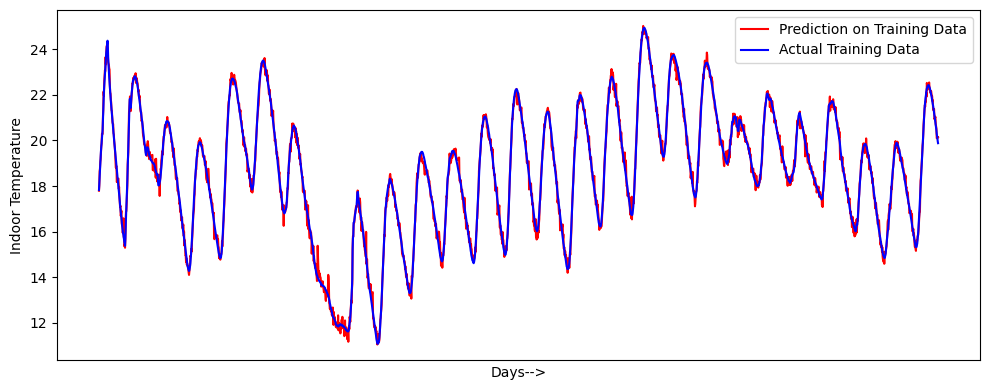

In [ ]:
# Plot the predicted values on Training data.
fig = plt.figure(figsize=(10,4))

sns.lineplot(data=(train),y = 'prediction', x = 'Id', color='red', label='Prediction on Training Data')
sns.lineplot(data=(train),y ='Indoor_temperature_room', x ="Id", color='blue', label='Actual Training Data')

plt.xlabel('Days-->')
plt.ylabel('Indoor Temperature')
plt.xticks([])
fig.tight_layout()
plt.show()

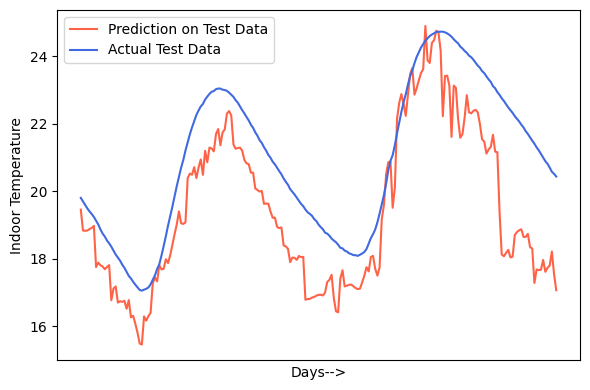

In [ ]:
# Plot the predicted values on Training data.
fig = plt.figure(figsize=(6,4))

sns.lineplot(data=(test),y ='prediction', x ="Id", color='tomato', label='Prediction on Test Data')
sns.lineplot(data=(test),y ='Indoor_temperature_room', x ="Id", color='royalblue', label='Actual Test Data')

plt.xlabel('Days-->')
plt.ylabel('Indoor Temperature')
plt.xticks([])
fig.tight_layout()
plt.show()

# XGBoost

In [ ]:
# Import XGBoost
import xgboost as xgb
from sklearn.metrics import mean_squared_error

In [ ]:
train = df.loc[df.index < '2012-04-09']
test  = df.loc[df.index >= '2012-04-09']
train.columns

Index(['Id', 'hour', 'dayofyear', 'time_id', 'CO2_(dinning-room)', 'CO2_room',
       'Relative_humidity_(dinning-room)', 'Relative_humidity_room',
       'Lighting_(dinning-room)', 'Lighting_room', 'Meteo_Rain',
       'Meteo_Sun_dusk', 'Meteo_Wind', 'Meteo_Sun_light_in_west_facade',
       'Meteo_Sun_light_in_east_facade', 'Meteo_Sun_light_in_south_facade',
       'Meteo_Sun_irradiance', 'Outdoor_relative_humidity_Sensor',
       'Day_of_the_week', 'Indoor_temperature_room'],
      dtype='object')

In [ ]:
FEATURES = ['Id', 'hour', 'dayofyear', 'time_id', 'CO2_(dinning-room)', 'CO2_room',
       'Relative_humidity_(dinning-room)', 'Relative_humidity_room',
       'Lighting_(dinning-room)', 'Lighting_room', 'Meteo_Rain',
       'Meteo_Sun_dusk', 'Meteo_Wind', 'Meteo_Sun_light_in_west_facade',
       'Meteo_Sun_light_in_east_facade', 'Meteo_Sun_light_in_south_facade',
       'Meteo_Sun_irradiance', 'Outdoor_relative_humidity_Sensor',
       'Day_of_the_week']

TARGET = 'Indoor_temperature_room'

X_train = train[FEATURES]
y_train = train[TARGET]

X_test = test[FEATURES]
y_test = test[TARGET]

In [ ]:
# Make the model.
xgb_model = xgb.XGBRegressor(n_estimators = 600,
                             max_depth = 4,
                             random_state = 39)

In [ ]:
xgb_model.fit(X_train, y_train)

# Store the predicted values in a new df, with the same time index as training data.
pred_train = xgb_model.predict(X_train)
pred_test  = xgb_model.predict(X_test)

# Error on Training and test data.
mse_train = mean_squared_error(y_train, pred_train)
mse_test = mean_squared_error(y_test, pred_test)
print('MSE on the training data is : ', mse_train)
print('MSE on the test set is.     :', mse_test)

MSE on the training data is :  0.00028315335246402093
MSE on the test set is.     : 4.441916019398857


In [ ]:
# Merge the predictions to our dataframe.
train['prediction'] = pred_train
test['prediction'] = pred_test
# train

<ipython-input-195-e4463f45cec2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['prediction'] = pred_train
<ipython-input-195-e4463f45cec2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['prediction'] = pred_test


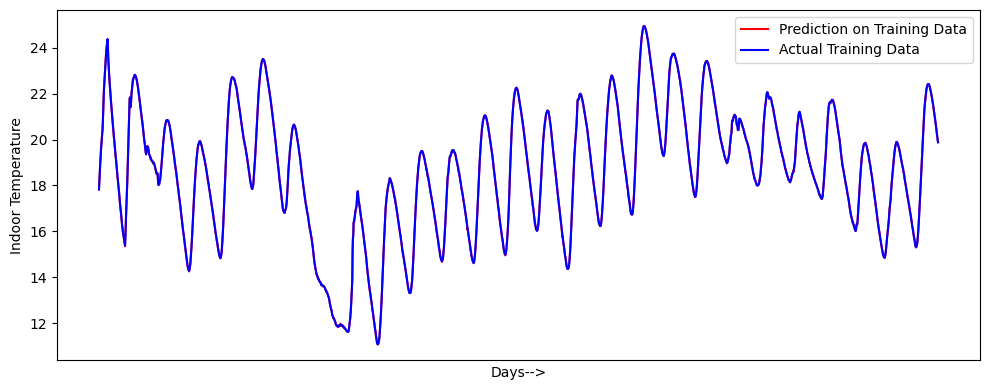

In [ ]:
# Plot the predicted values on Training data.
fig = plt.figure(figsize=(10,4))

sns.lineplot(data=(train),y = 'prediction', x = 'Id', color='red', label='Prediction on Training Data')
sns.lineplot(data=(train),y ='Indoor_temperature_room', x ="Id", color='blue', label='Actual Training Data')

plt.xlabel('Days-->')
plt.ylabel('Indoor Temperature')
plt.xticks([])
fig.tight_layout()
plt.show()

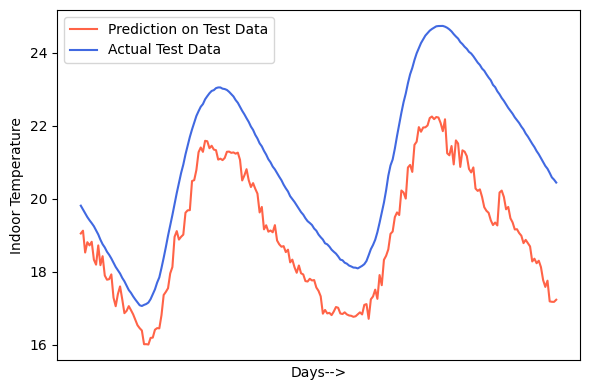

In [ ]:
# Plot the predicted values on Training data.
fig = plt.figure(figsize=(6,4))

sns.lineplot(data=(test),y ='prediction', x ="Id", color='tomato', label='Prediction on Test Data')
sns.lineplot(data=(test),y ='Indoor_temperature_room', x ="Id", color='royalblue', label='Actual Test Data')

plt.xlabel('Days-->')
plt.ylabel('Indoor Temperature')
plt.xticks([])
fig.tight_layout()
plt.show()